### Student Information
Name: Vicky Darika Djunawan

Student ID: 108006220

GitHub ID: vickydarika

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 2. Data Preparation

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [4]:
# Answer here
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [5]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [6]:
#Answer here
# from the back, last 10 records
X[-1:-11:-1]

# using loc (skip 2, until 9)
X.iloc[:9:2, 0:2]

# using loc (by position)
X.iloc[9:101:10, 1:3]

# sort values based on category label in descending order
X.sort_values('category', ascending=False)

,text,category,category_name
1128,From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden) ...,3,soc.religion.christian
540,From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...,3,soc.religion.christian
1474,From: xx155@yfn.ysu.edu (Family Magazine Sysop...,3,soc.religion.christian
1472,From: apodaca@spot.Colorado.EDU (mu'tafikah) S...,3,soc.religion.christian
546,From: mls@panix.com (Michael Siemon) Subject: ...,3,soc.religion.christian
...,...,...,...
308,From: pmoloney@maths.tcd.ie (Paul Moloney) Sub...,0,alt.atheism
305,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,0,alt.atheism
1815,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
682,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism


### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [7]:
# Answer here
X.loc[lambda f : f.category_name == 'soc.religion.christian'].loc[::10,  : ][0:5]
# X.loc[lambda f : f.category_name == 'soc.religion.christian'].iloc[::10,  : ][0:5]

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
27,From: ruthless@panix.com (Ruth Ditucci) Subjec...,3,soc.religion.christian
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
124,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
163,From: tbrent@ecn.purdue.edu (Timothy J Brent) ...,3,soc.religion.christian


## 4. Data Mining using Pandas

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [8]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis =1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [9]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

# X.isnull().apply(lambda x: dmh.check_missing_values(x))

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [10]:
# Answer here
# The X_sample will only take some of the data, 
# for example if you write X_sample = X.sample(n=1000) , the X in X_sample will only take 1000 data from all of the X
# if you execute it, it will only show 1000 rows (1000 data out of 2257 data)
X_sample = X.sample(n=1000) #random state

X
X_sample
len(X_sample) # = 1000
X_sample[0:10]

,text,category,category_name
1549,From: mark@ocsmd.ocs.com (Mark Wilson) Subject...,1,comp.graphics
1659,"Subject: Burzynski's ""Antineoplastons"" From: j...",2,sci.med
2084,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
2066,From: chert@dungeon.cirr.com (Chert Pellett) S...,1,comp.graphics
1245,From: dfield@flute.calpoly.edu (InfoSpunj (Dan...,2,sci.med
1405,From: aa888@freenet.carleton.ca (Mark Baker) S...,3,soc.religion.christian
1347,From: aaron@binah.cc.brandeis.edu (Scott Aaron...,3,soc.religion.christian
1484,From: diablo.UUCP!cboesel (Charles Boesel) Sub...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
714,From: pvconway@cudnvr.denver.colorado.edu Subj...,1,comp.graphics


Changes to X dataframe :
- The length of X and X_sample dataset is different.
- The size of the X_sample is smaller compared to the X dataset.
- The order of the X_sample is different (most ledt number, will change everytime you refresh the code).
- The category order is not sequential anymore.

In [11]:
#the original dataset length
len(X)

2257

In [12]:
#the sample dataset length
len(X_sample)

1000

In [13]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<AxesSubplot:title={'center':'Category distribution'}>

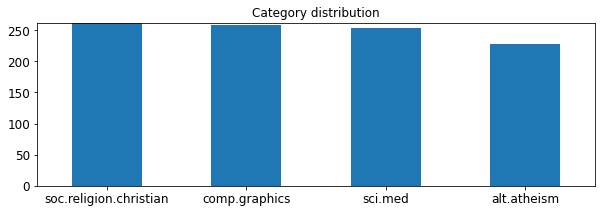

In [14]:
# Answer here
# use the max value from category in X_sample
upperbound = max (X_sample.category_name.value_counts())+1


# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upperbound], 
                                           rot = 0, fontsize = 12, figsize = (10,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

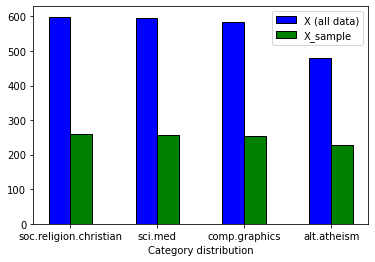

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

n=4
r = np.arange(n)
width = 0.25


plt.bar(r, X.category_name.value_counts(), color = 'b',
		width = 0.25, edgecolor = 'black',
		label='X (all data)')

plt.bar(r + width, X_sample.category_name.value_counts(), color = 'g',
		width = width, edgecolor = 'black',
		label='X_sample')


# plt.grid(linestyle='--')

plt.xticks(r + width/2,[ 'soc.religion.christian', 'sci.med', 'comp.graphics','alt.atheism'])
plt.xlabel( 'Category distribution' )
plt.legend()  #show the colour and its representation

plt.show()


### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [17]:
# Answer here
print(X[:1])
analyze(" ".join(list(X[:1].text)))

                                                text  category  category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics


['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [18]:
# Answer here
count_vect.get_feature_names()[37]


'01'

In [19]:
#when there are specific attribute need to be search :

fiftharr = X_counts[0:5, 0:100].toarray()[4]

# check if there's any 1 value located
index = np.where(fiftharr==1)[0][1]

# get the name out from that index
count_vect.get_feature_names()[index]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

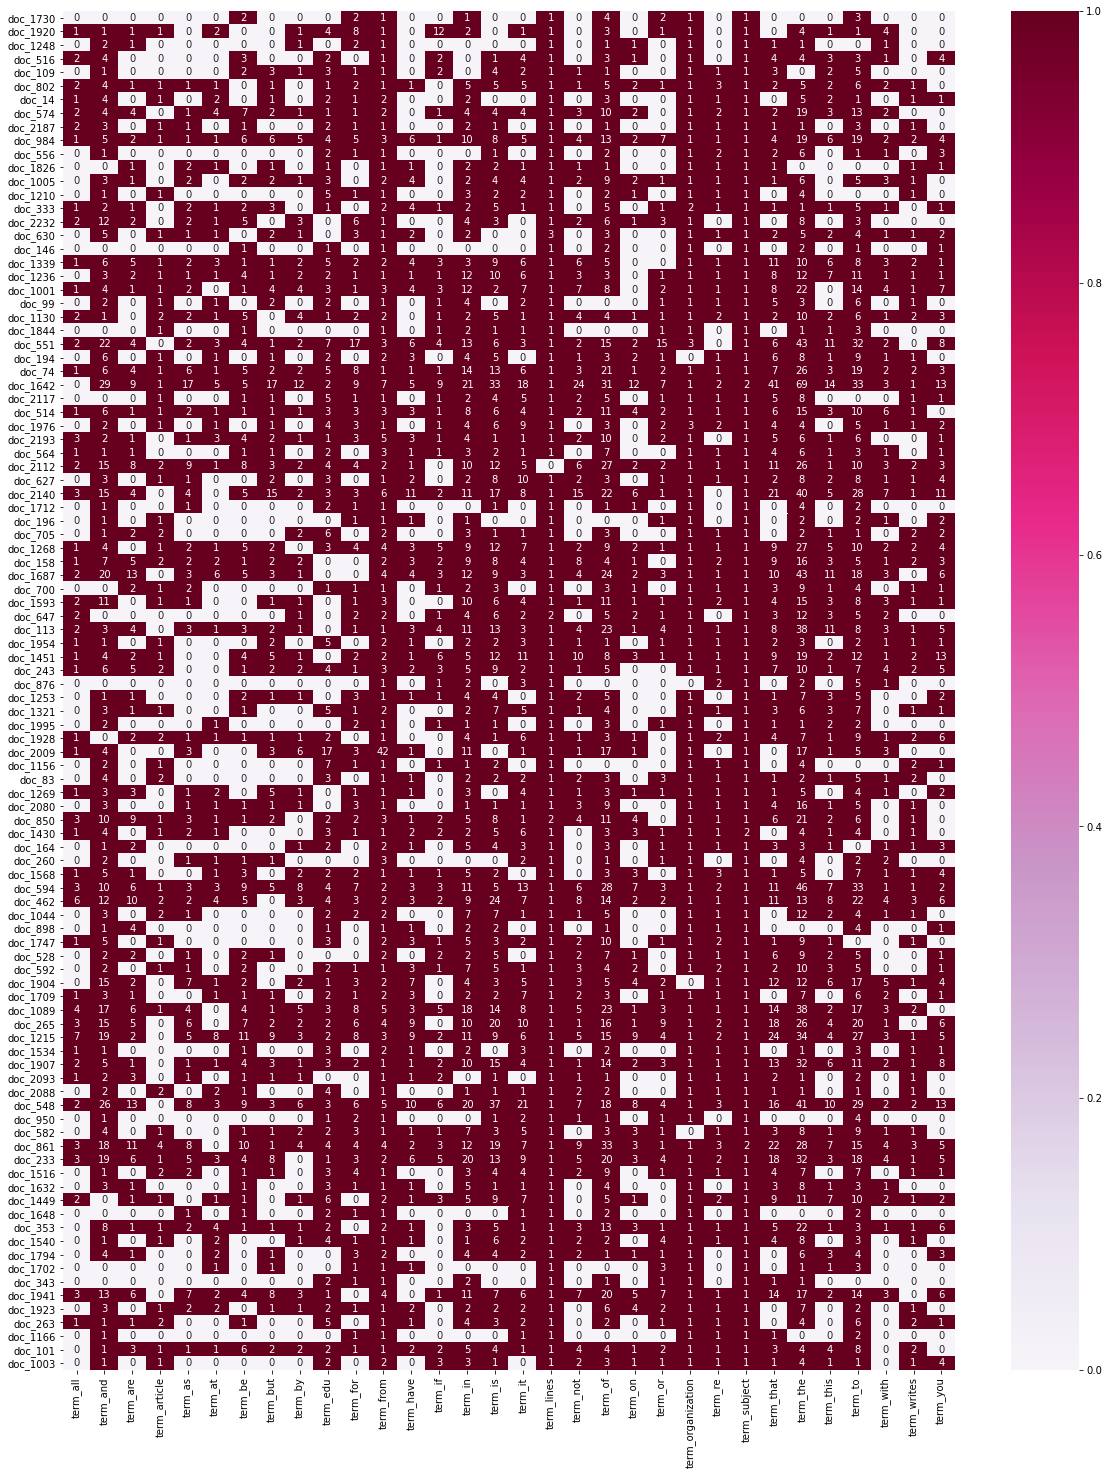

In [20]:
# Answer here


import seaborn as sns

X_sample = X.sample(n=100) # random sample
vectorizer = CountVectorizer(min_df=50)
X_sample_counts = vectorizer.fit_transform(X_sample.text)

# features name of vectorizer
plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in list(X_sample.index)]
plot_z = X_sample_counts.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 25))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)



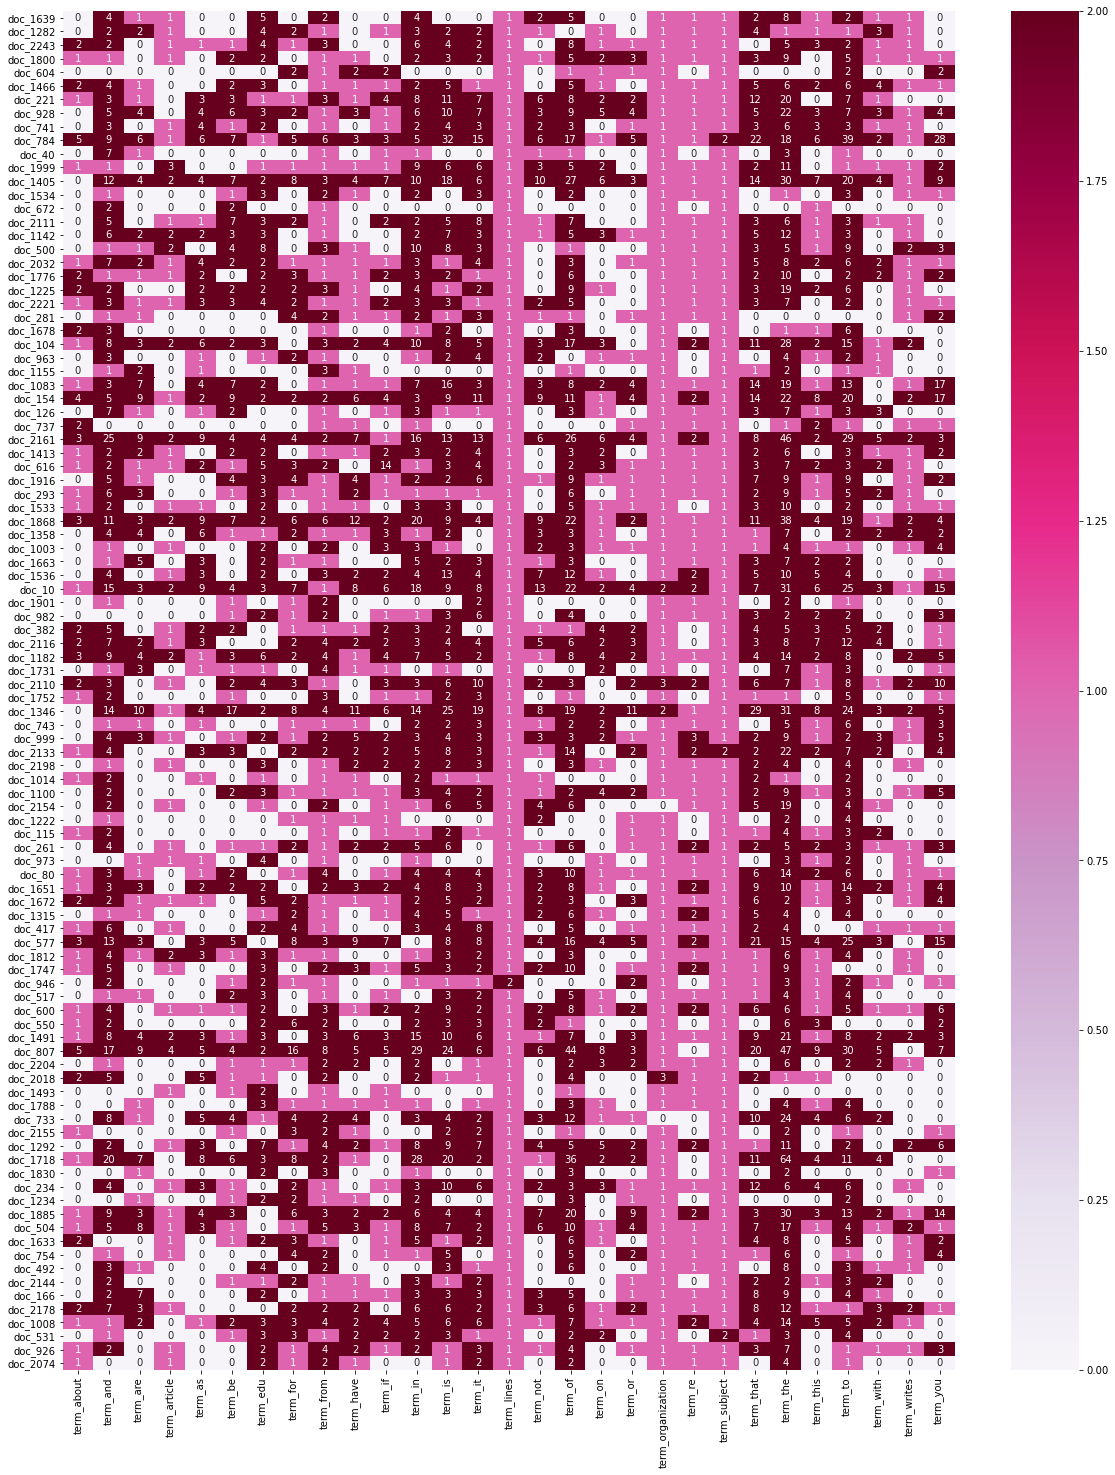

In [21]:
# Answer here


import seaborn as sns

X_sample = X.sample(n=100) # random sample
vectorizer = CountVectorizer(min_df=50)
X_sample_counts = vectorizer.fit_transform(X_sample.text)

# features name of vectorizer
plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in list(X_sample.index)]
plot_z = X_sample_counts.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 25))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

To have a better visualization, you can use min_df to remove the phrases that seldom to appear. You also be able to can set the size of the the plot  in "figsize=(20, 25)" this code. You can choose the colour of the plot, and make each frequent term have a different colour, such as the first and second table. For the second table, if the term is only appear once, it will have a light pink, and for the terms that appear twice or more, it will have darker colour (vmin=0, vmax=2).

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

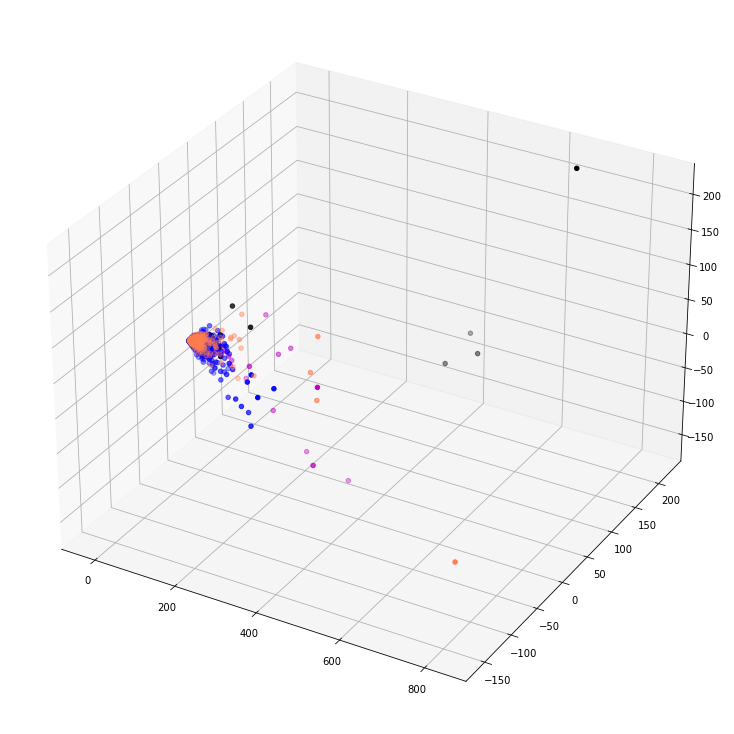

In [22]:
# Answer here

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import pylab

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())


fig = pylab.figure(figsize = (25,10))
ax = Axes3D(fig)

# ax = plt.axes(projection='3d')

col = ['coral', 'blue', 'black', 'm']

# Data for three-dimensional scattered points
for c, category in zip(col, categories):
    xdata = X_reduced[X['category_name'] == category].T[0]
    ydata = X_reduced[X['category_name'] == category].T[1]
    zdata = X_reduced[X['category_name'] == category].T[2]
    ax.scatter3D(xdata, ydata, zdata, c=c, cmap='Greens');
plt.show()

Similarly to the previous visualization, the data is forming a cluster.
We can see how each data point is dispersed in 3D space.
When compared to the 2D visualization, the grouping is more visible.
It is more useful for understand and learning the data. 
You can also change the angle of the figure if you want, by using ax.view_init(..,..).

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

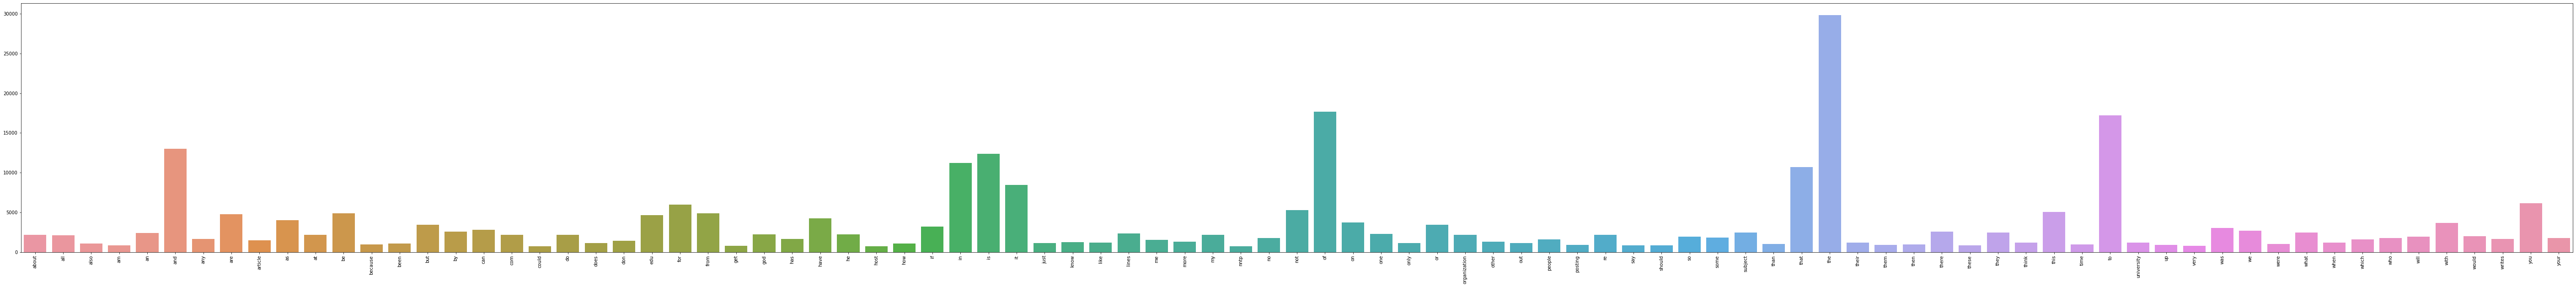

In [30]:
# Answer here
# import plotly
import plotly.express as px

# note this takes time to compute. You may want to reduce 
# the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names(), 
            y=term_frequencies)
g.set_xticklabels(count_vect.get_feature_names(), rotation = 90);
fig.show()

Yes, you can use use min_df to only pick the most frequent terms to reduce the large numbers.

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


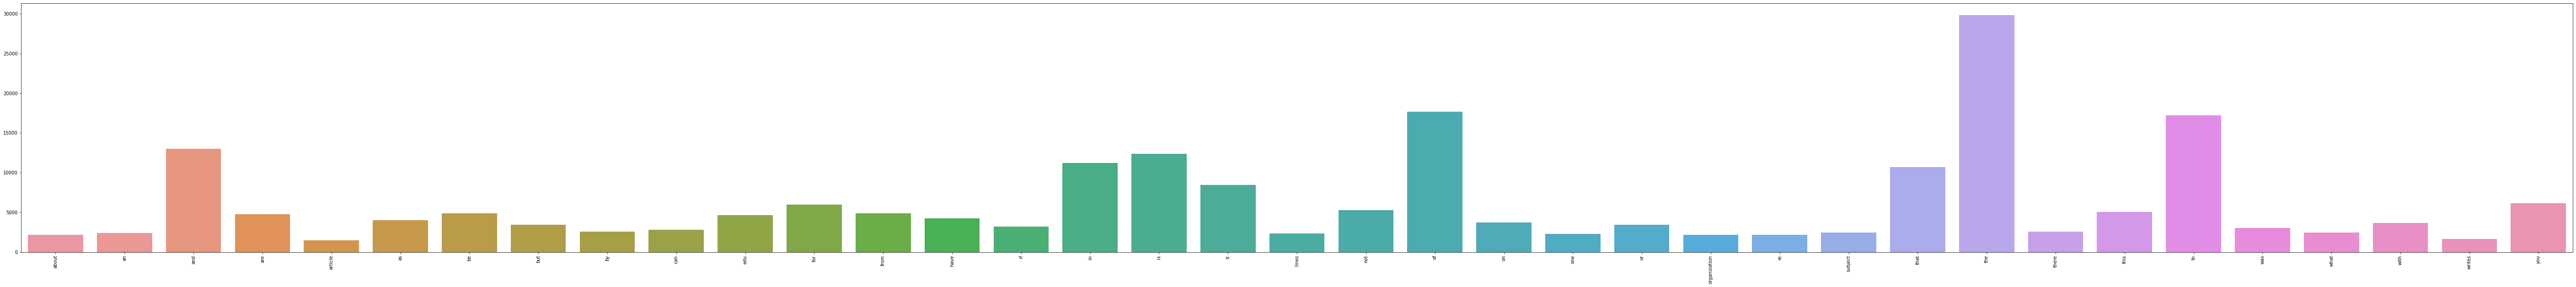

In [35]:
count_vect = CountVectorizer(min_df=1000)
X_counts = count_vect.fit_transform(X.text)

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names(), 
            y=term_frequencies)
g.set_xticklabels(count_vect.get_feature_names(), rotation = 90);
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

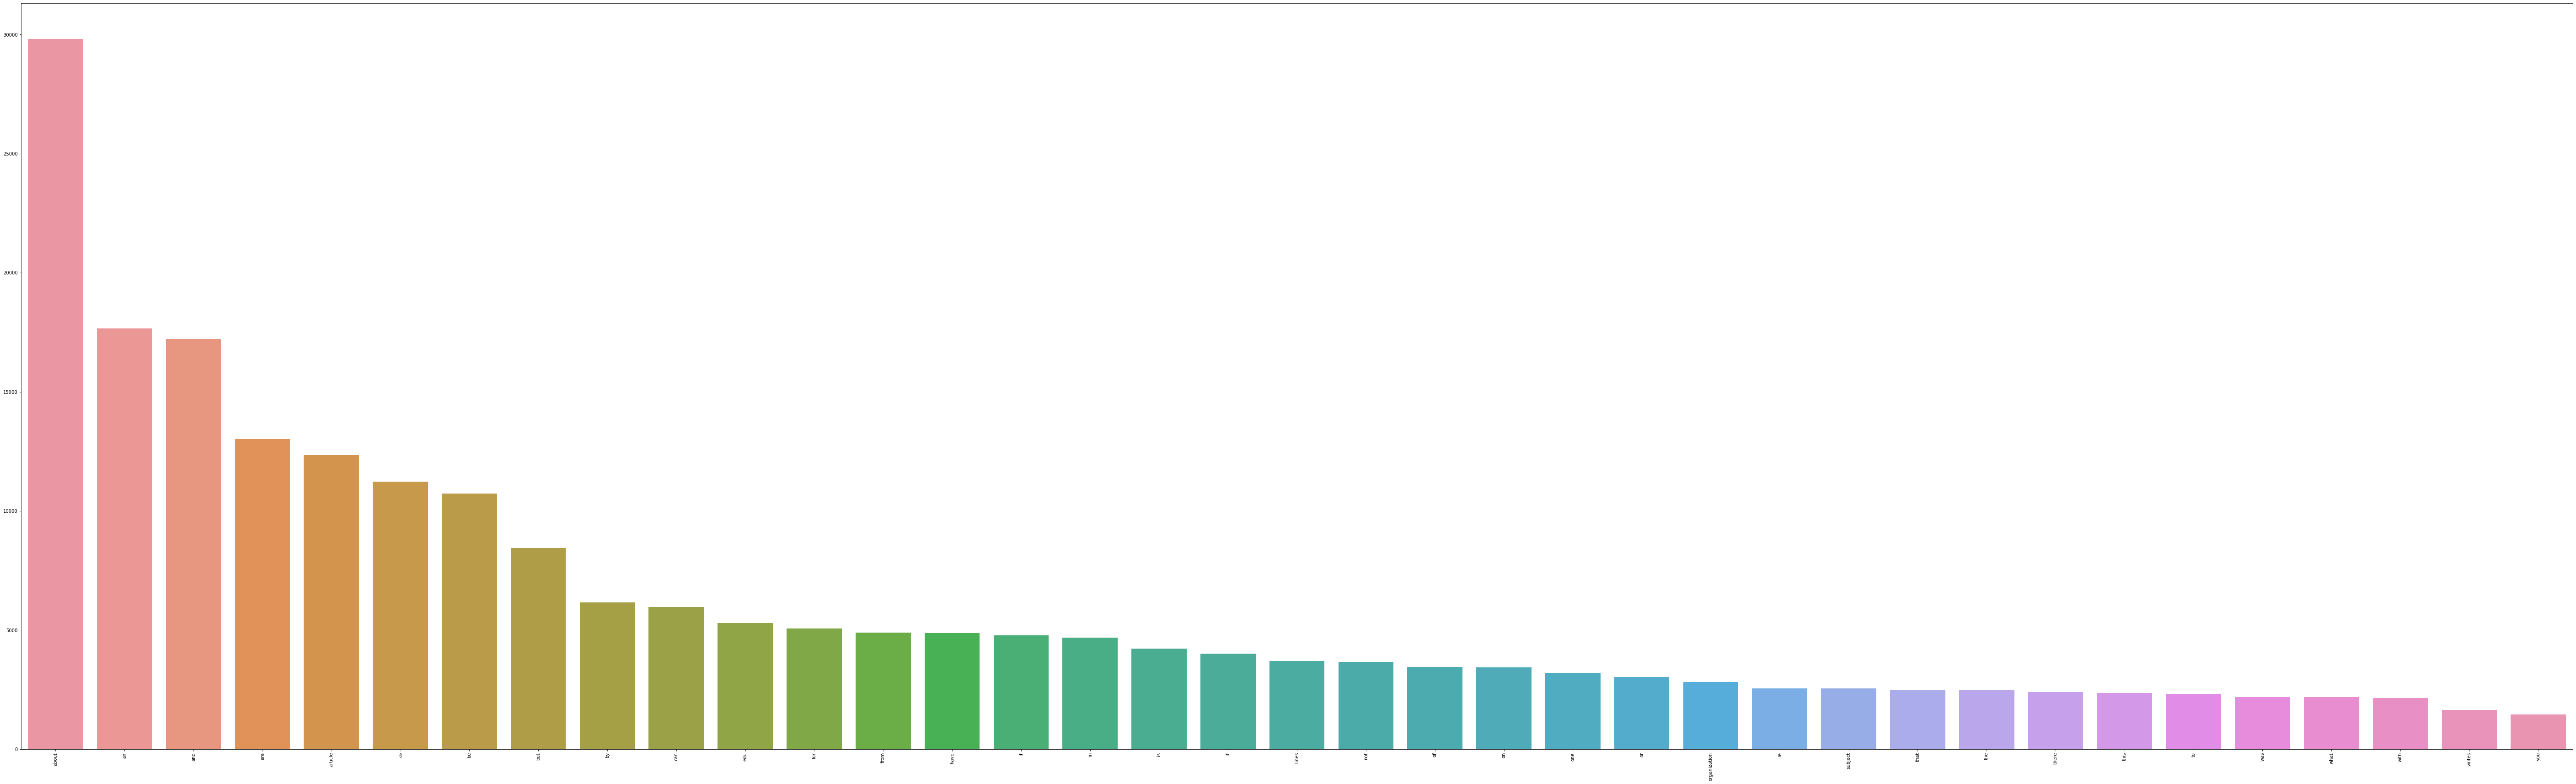

In [40]:
# Answer here

sorted_array = np.sort(term_frequencies)
reverse_array = sorted_array[::-1]

plt.subplots(figsize=(100, 30))
g = sns.barplot(x=count_vect.get_feature_names(), 
                y=reverse_array)
g.set_xticklabels(count_vect.get_feature_names(), rotation = 90)
plt.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

The binarization can be generated using category_name. The result of the binarization is also the same as category. So, it does work.

In [37]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [38]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
